In [ ]:
#COMPARACIÓN DE MÉTODOS DE EXTRACCIÓN DE ADN

In [ ]:
#El objetivo de este miniproyecto es analizar datos de diferentes métodos de extracción de ADN en distintas especies para identificar cuál
# método produce un mayor rendimiento y cuales son los mejores métodos para cada especie presentada.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = {
    "Muestra": [f"M{i+1}" for i in range(25)],
    "Especie": [
        "Maíz", "Maíz", "Maíz", "Maíz", "Maíz",
        "Tomate", "Tomate", "Tomate", "Tomate", "Tomate",
        "Arabidopsis", "Arabidopsis", "Arabidopsis", "Arabidopsis", "Arabidopsis",
        "Maíz", "Tomate", "Arabidopsis", "Maíz", "Tomate",
        "Arabidopsis", "Maíz", "Tomate", "Arabidopsis", "Maíz"
    ],
    "Metodo": [
        "CTAB", "CTAB", "CTAB", "Kit Comercial", "Kit Comercial",
        "CTAB", "CTAB", "Kit Comercial", "Kit Comercial", "Kit Comercial",
        "CTAB", "Kit Comercial", "Fenol-Cloroformo", "Fenol-Cloroformo", "CTAB",
        "Fenol-Cloroformo", "Fenol-Cloroformo", "Kit Comercial", "CTAB", "CTAB",
        "Kit Comercial", "Fenol-Cloroformo", "CTAB", "Kit Comercial", "Fenol-Cloroformo"
    ],
    "Rendimiento": [
        24.1, 22.8, 25.3, 30.1, 29.8,
        23.7, 24.0, 31.2, 29.5, 30.0,
        19.6, 20.1, 21.3, 22.7, 20.0,
        26.5, 27.1, 21.9, 23.5, 24.8,
        20.4, 25.6, 28.0, 22.2, 24.9
    ],
    "Pureza": [
        1.82, 1.79, 1.85, 1.76, 1.80,
        1.74, 1.77, 1.79, 1.75, 1.80,
        1.88, 1.85, 1.86, 1.83, 1.84,
        1.81, 1.80, 1.87, 1.78, 1.76,
        1.89, 1.85, 1.83, 1.84, 1.82
    ]
}

df_limpio = pd.DataFrame(df) #Convertir a DataFrame nuestros datos
print(df_limpio)

   Muestra      Especie            Metodo  Rendimiento  Pureza
0       M1         Maíz              CTAB         24.1    1.82
1       M2         Maíz              CTAB         22.8    1.79
2       M3         Maíz              CTAB         25.3    1.85
3       M4         Maíz     Kit Comercial         30.1    1.76
4       M5         Maíz     Kit Comercial         29.8    1.80
5       M6       Tomate              CTAB         23.7    1.74
6       M7       Tomate              CTAB         24.0    1.77
7       M8       Tomate     Kit Comercial         31.2    1.79
8       M9       Tomate     Kit Comercial         29.5    1.75
9      M10       Tomate     Kit Comercial         30.0    1.80
10     M11  Arabidopsis              CTAB         19.6    1.88
11     M12  Arabidopsis     Kit Comercial         20.1    1.85
12     M13  Arabidopsis  Fenol-Cloroformo         21.3    1.86
13     M14  Arabidopsis  Fenol-Cloroformo         22.7    1.83
14     M15  Arabidopsis              CTAB         20.0 

In [48]:
#Calcular el promedio de cada método basandonos en su rendimiento para verificar cuál es el mejor 

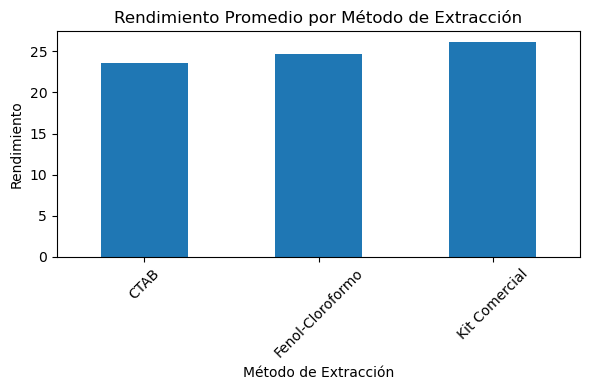

Metodo
CTAB                23.580000
Fenol-Cloroformo    24.683333
Kit Comercial       26.133333
Name: Rendimiento, dtype: float64
El mejor promedio de rendimiento es del método:  Kit Comercial


In [57]:
promedio_rendimiento = df_limpio.groupby("Metodo")["Rendimiento"].mean() #Agrupamos por Método y Rendimiento y sacamos el promedio de cada uno
mejor_metodo = promedio_rendimiento.idxmax() #Obtenemos el Método con el mejor promedio

#Gráfico de barras de promedio de cada método
promedio_rendimiento.plot(kind="bar", figsize=(6,4), legend=False) #(kind = bar) es el tipo de gráfico que queremos, figsize=(6,4) ancho y alto de la barra, desactivar leyenda
plt.title("Rendimiento Promedio por Método de Extracción")
plt.xlabel("Método de Extracción")
plt.ylabel("Rendimiento")
plt.xticks(rotation=45) #Modifica las etiquetas del eje X y las rota 45 grados.
plt.tight_layout()#Ajusta automáticamente la posición de todos los elementos del gráfico para que no se corten o encimen.
plt.savefig("rendimiento_por_metodo.png")
plt.show()

print(promedio_rendimiento) 
print("El mejor promedio de rendimiento es del método: ", mejor_metodo) 

In [50]:
#Calcular el promedio de la pureza en cada especie

In [55]:
promedio_pureza = df_limpio.groupby("Especie")["Pureza"].mean() #Agrupamos por Especia y Pureza y sacamos el promedio de cada uno
print(promedio_pureza)
mejor_especie = promedio_pureza.idxmax() #Obtenemos la especia con el mejor promedio de pureza
print("El mejor promedio de pureza es la especie: ",mejor_especie)


Especie
Arabidopsis    1.857500
Maíz           1.808889
Tomate         1.780000
Name: Pureza, dtype: float64
El mejor promedio de pureza es la especie:  Arabidopsis


In [35]:
#Mejor rendimiento con la mejor especie

In [36]:
condicion = df_limpio[(df_limpio["Especie"]== mejor_especie)& (df_limpio["Metodo"]==mejor_metodo)] #Si la especie es igual a la mejor especie, es decir "Arabidopsis" y si el metodo es igual al mejor método, es decir "Kit comercial"
print (condicion)#Imprime las líneas de datos que contengan esta condición

   Muestra      Especie         Metodo  Rendimiento  Pureza
11     M12  Arabidopsis  Kit Comercial         20.1    1.85
17     M18  Arabidopsis  Kit Comercial         21.9    1.87
20     M21  Arabidopsis  Kit Comercial         20.4    1.89
23     M24  Arabidopsis  Kit Comercial         22.2    1.84


In [38]:
grupos = df_limpio.groupby(["Especie","Metodo"])["Rendimiento"].mean()
mejor_metodo = grupos.groupby(level=0).idxmax()
print(grupos)

Especie      Metodo          
Arabidopsis  CTAB                19.800000
             Fenol-Cloroformo    22.000000
             Kit Comercial       21.150000
Maíz         CTAB                23.925000
             Fenol-Cloroformo    25.666667
             Kit Comercial       29.950000
Tomate       CTAB                25.125000
             Fenol-Cloroformo    27.100000
             Kit Comercial       30.233333
Name: Rendimiento, dtype: float64


In [39]:
mejor_metodo = grupos.groupby(level=0).idxmax() #Agrupa todos los datos según el primer nivel del índice (por especie), y para cada grupo dime cuál índice tiene el valor máximo
resultado = mejor_metodo.apply(lambda x: x[1])  # De cada tupla, dame solo el segundo valor (x[1]) que corresponde al método
resultado = resultado.reset_index()#Crea un nuevo índice
resultado.columns = ["Especie", "Mejor Método"]#Renombra las columnas del Data Frame
print(resultado)

       Especie      Mejor Método
0  Arabidopsis  Fenol-Cloroformo
1         Maíz     Kit Comercial
2       Tomate     Kit Comercial
